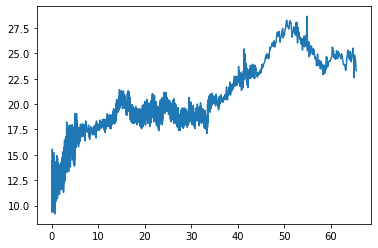

In [2]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *

from sklearn.linear_model import LinearRegression

df = read_csv('data/global-temperatures.tsv', sep='\t')
X = df['Age My'].values
y = df['Ts'].values

regressor = LinearRegression()
regressor.fit(X.reshape(-1,1),y.reshape(-1,1))

plot(X,y)
show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as linear_model


from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
    ('linear', linear_model.LinearRegression(fit_intercept=False))])

model.fit(X[::100].reshape(-1,1),y[::100].reshape(-1,1))

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])

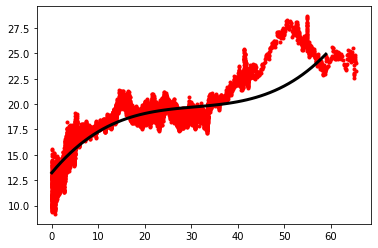

In [32]:
x_grid = arange(0,60)

plot(X, y, 'r.',
     label='data',
     linewidth=3)

plot(x_grid, model.predict(x_grid.reshape(-1,1)),
     label='model',
     linewidth=3,color='k')





In [ ]:
from scipy import stats

from sklearn.linear_model import BayesianRidge

# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()